<a href="https://colab.research.google.com/github/tannerhonnef/adleotwh/blob/main/graded_assignment2_twh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

Work through the assignment 2 notebook, and use this notebook to provide your answers. 

To submit the assignment, you will need to use GitHub and the existing private repository you already created called `adleoxyz` (xyz is your initials)

Once you have completed the assignment:
- Commit your notebook from colab to your private GitHub repo
- The notebook should be named assignment2_xyz.ipynb, with xyz again replaced by your initials.

# Answers to the theoretical questions

Please provide your answers to questions 1-4 here

**Answer to Q1**
No, I would not expect that an MLP would be able to tell that the figure in the right side of the image is a dog if it had only seen one on the left side of the image.  CNNs are designed to detect patterns even if they are present in a part of the image where they would not be expected so they would be able to see the dog on the right side of the image even if it was only expecting to see the dog on the left side of the image.  In the same sense, a CNN would recognize a dog flying in the sky even though we would not expect to see a dog flying.  The CNN may not be as confident about the prediction of the creature in the sky being a dog because most of what it would have seen in training would have been dogs on the ground.  On the other hand, MLP takes vector as input so it does not get a spatial relationship of pixels.

**<font color='red'> 5/5 points on Q1</font>**

**Answer to Q2**

a) 280

b) The shape of the weight and bias is a 1x10 array.

c) The computational cost would be (input height * input width * channels * dimensions * kernel width * kernel height) (5 * 5 * 3 * 10 * 3 * 3) = 6750

**<font color='red'> 9/10 points on Q2</font>**

<p><font color='blue'>
a)
</br>
[(fxfxC)+1]xD inside the paranthesis is the number of trainable parameters for a single filter. Number 1 is refering to the bias term. And D is number of filters we want aka. number of output features.
</br>
b)
</br>
weight shape: (D, C, f, f)
</br>
bias shape: (D, )
</br>
c)
</br>
The total number of FLOPs required for the convolution and the bias addition can be computed as follows:
</br>
</br>
FLOPs = [(f x f x C_in + (f x f x (C_in - 1))) x C_out + C_out] x (H_in - f + 1) x (W_in - f + 1) x Batch_size
</br>
</br>
Let's go through the formula step by step. Assuming the input to the layer has dimensions "[Batch_size, H_in, W_in, C_in]", the kernel has dimensions "[C_out,f, f, C_in]", and the output has dimensions "[Batch_size, (H_in - f + 1), (W_in - f + 1), C_out]".
</br>
</br>
f x f x C_in: is the number of trainable weights in a filter.
</br>
</br>
(f x f x (C_in - 1)): To see why, let's break down the dot product operation required for each output channel in a 2D convolution layer. We need to multiply each element of the kernel with the corresponding element in the input volume, and then sum these products together to obtain a scalar output value. However, We only need to perform "C_in - 1" additions when summing "C_in" matrices because we can sum them pairwise using "C_in/2" additions, then sum the resulting sums pairwise again, and so on, until we have a single sum. For example, suppose we want to compute the sum of 4 matrices, A, B, C, and D. We can first compute the pairwise sums "A + B" and "C + D", which requires 2 additions. We can then compute the pairwise sum of these two intermediate sums, "(A + B) + (C + D)", which requires 1 addition. Finally, we have the sum of all 4 matrices, which required a total of 3 additions. More generally, the sum of n matrices can be computed using n-1 additions.
</br>
</br>
(f x f x C_in + (f x f x (C_in - 1))): this statement now accounts for the total number of multiplications and summations for trainable weights of a single filter in a conv layer.
</br>
</br>
(f x f x C_in + (f x f x (C_in - 1))) x C_out: we now consider the number of output features, aka. number of filters we want.
</br>
</br>
[(f x f x C_in + (f x f x (C_in - 1))) x C_out + C_out]: by adding the operations for the bias we completed the total number of arithmetic operations involved for the trainable parameters of all the filters.
</br>
</br>
Now how many times we need to repeat this operation? All we calculated so far is required to make a single position in our output. So we need to repeat the operation as the size of the output. We already considered the number of output channels so we only need to pay attention to W and H of the output. 

In a valid conv without padding and unit stride the output will be:
 `(H or W) - f + 1`, hence: `[(f x f x C_in + (f x f x (C_in - 1))) x C_out + C_out] x (H_in - f + 1) x (W_in - f + 1)`
</br>
</br>
If we are considering the batch size in our calculation then:
`[(f x f x C_in + (f x f x (C_in - 1))) x C_out + C_out] x (H_in - f + 1) x (W_in - f + 1) x Batch_size` </font> </p>

**Answer to Q3**




**<font color='red'> 0/5 points on Q3</font>**

**Answer to Q4**

VGG is very simple containing 16 convolutional layers and only 3x3 convolutions.  The goal of VGG is to reduce the number of parameters in convolutional layers to help reduce the training time of the model.  By reducing the training variables, the model will learn faster and will be more resistant to overfitting.

GoogLeNet is based on using a very small number of convolutions to help reduce the number of parameters.  The model has also shown extrememly high accuracy rates that resemble that of a human.  It focuses on using different size kernels within the same layer by working wider rather than deeper because different sized kernels will be needed to detect different objects.

ResNet was created with the idea in mind to use shortcut connections so that simple problems did not need to be overcomplicated.  ResNet's goal is to be able to build deeper networks and find the optimized number of layers.  Both of these considerations would help ResNet to avoid the vanishing gradient problem.

**<font color='red'> 4/5 points on Q4</font>**

<p><font color='blue'> VGG Family: Simple structure with all conv layers have a small kernel size of size 3. The idea is stacking many such conv layers with small kernels can increase the RF linearly as 2 consequtive 3x3conv layers will have the same RF as a 5x5 conv layer. further including multiple gradual pooling in between conv layers will increase the RF multiplicatively. Poolings reduces the number of parameters and VGG leverage that by doubling the width of the network after each downsampling to keep a high capacity network.

GoogLeNet Family: They introduced the idea of parallel processing by using branches of conv layers with different kernel sizes into the blocks that buildup the model. Another novelty of this model was showing that careful design of specific building blocks can make models with high predictive powers but the design trend currently favors deep models that are repititions of simple blocks.

ResNet Family: With ResNet for the first time training of models with hundreds of layers became possible. Resnet uses branching in its block with specifically two branches. An identity branch that passes the input unchanged or in some variations passes a linear transformation of the input. The residual branch consist of two 3x3 conv+BN+ReLU layers. Output will be summation of the two branches. The idea is the signal can pass unchanged or if needed get modified by the residual branch. During the backward pass the derivative has two options to go through which is hugely effective in battling the vanishing gradient problem.</font></p> 

# Coding Assignment 1

Follow the instructions below to complete your coding assignment. 

Run the code below unchanged, unless otherwise indicated. 

## Static code 1

Run unchanged

Mount drive and run imports

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

from sklearn import metrics
from sklearn import decomposition
from sklearn import manifold
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import numpy as np

import copy
import random
import time

from IPython.core.debugger import set_trace

## Variables to set

- Model save path: Modify 'save_dir' to the path to your already downloaded MNIST dataset (from assignment 1).

In [ ]:
save_dir = "/content/gdrive/MyDrive/clarkFiles/dsci215/assignment2/"

## Static code 2

### Transforms and loads (Steps 1.1-1.5)

Necessary transforms - run unchanged


In [ ]:
mnist_mean = 0.13066048920154572
mnist_std = 0.30810779333114624

train_transforms = transforms.Compose(
    [transforms.RandomRotation(5, fill=(0,)),
     transforms.RandomCrop(28, padding=2),
     transforms.ToTensor(),
     transforms.Normalize(mean=[mnist_mean], std=[mnist_std])]
     )

test_transforms = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=[mnist_mean], std=[mnist_std])]
     )

Load and split

In [ ]:
train_data = datasets.MNIST(root=save_dir,
                            train=True,
                            download=True,
                            transform=train_transforms)

test_data = datasets.MNIST(root=save_dir,
                           train=False,
                           download=False,
                           transform=test_transforms)

train_ratio = 0.9

n_train_examples = int(len(train_data) * train_ratio)
n_valid_examples = len(train_data) - n_train_examples

train_data, valid_data = data.random_split(train_data,[n_train_examples, 
                                                       n_valid_examples])

valid_data = copy.deepcopy(valid_data)
valid_data.dataset.transform = test_transforms

Make iterable

In [ ]:
# define batch size first
train_bsize = 54   # training batch size--can change for optional part

In [ ]:
# Don't change this cell
train_loader = data.DataLoader(train_data,
                               shuffle=True,
                               batch_size=train_bsize)

valid_loader = data.DataLoader(valid_data,
                               shuffle=False,
                               batch_size=train_bsize)

test_loader = data.DataLoader(test_data,
                              shuffle=False,
                              batch_size=train_bsize)

### Metrics and some other necessary functions

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc


def train(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):

        x = Variable(x).to(device)
        y = Variable(y).to(device)

        y_pred = model(x)
        
        loss = criterion(y_pred, y)
        acc = calculate_accuracy(y_pred, y)

        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)


def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    # Disable automatic differentiation as we don't do optimization on eval.
    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):

            x = Variable(x).to(device)
            y = Variable(y).to(device)

            y_pred = model(x)
            
            loss = criterion(y_pred, y)
            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)


def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

def plot_confusion_matrix(labels, pred_labels):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = metrics.confusion_matrix(labels, pred_labels)
    cm = metrics.ConfusionMatrixDisplay(cm, display_labels=range(10))
    cm.plot(values_format='d', cmap='Blues', ax=ax)

def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc


## Task 1: Adjust the model

Modify your MLP as required

**<font color='red'> 15/15 points on task 1 & 2 in coding assignment 1</font>**

In [ ]:

class myLeNet(nn.Module):
    def __init__(self, in_dim, num_classes):
        super(myLeNet, self).__init__()
        # feature extraction part
        self.conv1 = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2),
                                   nn.ReLU(),
                                   nn.MaxPool2d(kernel_size=2, stride=2),
#                                   nn.Conv2d(in_channels=10, out_channels=16, kernel_size=5, stride=1),

                                   nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
                                   nn.ReLU(),
                                   nn.MaxPool2d(kernel_size=2, stride=2),
                                   )

        # classification part
        self.classifier = nn.Sequential(#nn.Linear(in_features=400, out_features=120),
                                        nn.Linear(in_features=400, out_features=120),
                                        nn.ReLU(inplace=True),
                                        nn.Linear(in_features=120, out_features=84),
                                        nn.ReLU(inplace = True),
                                        nn.Linear(in_features=84, out_features=10),
                                        )
                                        

    def forward(self, x):  
        conv1 = self.conv1(x)                                                     
        x = conv1.reshape(conv1.size(0), -1)
        predict = self.classifier(x)                          
        return predict

If you are struggling to get it working, here is a commented out version of the example model that you can run and adapt.  You might want to use some of the other 3 examples that we suggested for structuring the model class

Define the parameters needed to run the model

In [ ]:
in_dim = 1
initial_lr = 0.001    # Hyper-parameter that you can change for optional part
num_epochs = 10    # Hyper-parameter that you can change for optional part

# new variables
num_classes = 10

## Task 2: Show your work

Run and print the model

In [ ]:
# Don't change this cell
model = myLeNet(in_dim, num_classes = num_classes)
print(model)

myLeNet(
  (conv1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


Show the number of parameters in the model

In [ ]:
# Don't change this cell
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 61,706 trainable parameters


Optimizer, loss criterion, and GPU/CPU switch

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=initial_lr)
criterion = nn.CrossEntropyLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

Train the model

In [ ]:
best_val_loss = float('inf')
train_loss_per_epoch = []
val_loss_per_epoch = []
epoch_counter = []

for epoch in trange(num_epochs):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, valid_loader, criterion, device)

    #simple implementation of early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model_mlp_tutorial.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {val_loss:.3f} |  Val. Acc: {val_acc*100:.2f}%')

    epoch_counter.append(epoch)
    train_loss_per_epoch.append(train_loss)
    val_loss_per_epoch.append(val_loss)

  0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 28s
	Train Loss: 0.335 | Train Acc: 89.47%
	 Val. Loss: 0.092 |  Val. Acc: 97.21%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 32s
	Train Loss: 0.108 | Train Acc: 96.62%
	 Val. Loss: 0.049 |  Val. Acc: 98.43%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 29s
	Train Loss: 0.083 | Train Acc: 97.37%
	 Val. Loss: 0.062 |  Val. Acc: 98.02%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 29s
	Train Loss: 0.067 | Train Acc: 97.88%
	 Val. Loss: 0.042 |  Val. Acc: 98.74%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 27s
	Train Loss: 0.063 | Train Acc: 98.01%
	 Val. Loss: 0.044 |  Val. Acc: 98.56%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 27s
	Train Loss: 0.054 | Train Acc: 98.30%
	 Val. Loss: 0.033 |  Val. Acc: 98.89%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 28s
	Train Loss: 0.051 | Train Acc: 98.41%
	 Val. Loss: 0.035 |  Val. Acc: 98.94%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 27s
	Train Loss: 0.047 | Train Acc: 98.58%
	 Val. Loss: 0.032 |  Val. Acc: 99.01%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 27s
	Train Loss: 0.044 | Train Acc: 98.63%
	 Val. Loss: 0.037 |  Val. Acc: 98.86%


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/112 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 26s
	Train Loss: 0.041 | Train Acc: 98.72%
	 Val. Loss: 0.033 |  Val. Acc: 98.99%


Plot the results

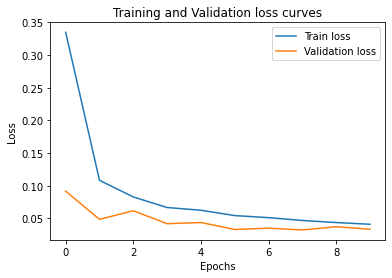

In [ ]:
plt.plot(epoch_counter, train_loss_per_epoch, label="Train loss")
plt.plot(epoch_counter, val_loss_per_epoch, label="Validation loss")
plt.title("Training and Validation loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

Evaluate the performance

In [ ]:
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Evaluating:   0%|          | 0/186 [00:00<?, ?it/s]

Test Loss: 0.032 | Test Acc: 98.99%


Show the matrix

## Coding Assignment 2
Download a picture from internet that is among the 1000 classes of the ImageNet dataset labels. Choose five different pre-trained models in torchvision and report the top-1 accuracy related to each model.

Organize your answer like this: Link to the image you have chosen if its available on the web. If the image is in your local machine, you can either upload it in your github repo with the name infer_img_assgn2. Or copy the image to your gdrive and give it permission for everyone with the link (rclick the image --> share with google Drive).

Use the template below to complete this coding assignment.

### Static code 3

This combines the packages and model loads with Step 2, for simplicity

#### Load pre-trained models

Load up models and inspect names. Note that we use here a slightly more compact approach to printing the model names

In [ ]:
import requests
import torchvision
import torch.utils.model_zoo as model_zoo
import torchvision.models as models
from PIL import Image

# model names
model_names = sorted(name for name in models.__dict__ \
                     if name.islower() and not name.startswith("__"))
# print(model_names)
mod_index = np.linspace(start=0, stop=len(model_names), num=20) \
              .astype('int').tolist()
for i in range(len(mod_index[:-1])):
    print(model_names[mod_index[i]:mod_index[i+1]])

['_api', '_meta', '_utils', 'alexnet', 'convnext']
['convnext_base', 'convnext_large', 'convnext_small', 'convnext_tiny', 'densenet', 'densenet121']
['densenet161', 'densenet169', 'densenet201', 'detection', 'efficientnet', 'efficientnet_b0']
['efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5']
['efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_l', 'efficientnet_v2_m', 'efficientnet_v2_s', 'get_model']
['get_model_builder', 'get_model_weights', 'get_weight', 'googlenet', 'inception', 'inception_v3']
['list_models', 'maxvit', 'maxvit_t', 'mnasnet', 'mnasnet0_5', 'mnasnet0_75']
['mnasnet1_0', 'mnasnet1_3', 'mobilenet', 'mobilenet_v2', 'mobilenet_v3_large']
['mobilenet_v3_small', 'mobilenetv2', 'mobilenetv3', 'optical_flow', 'quantization', 'regnet']
['regnet_x_16gf', 'regnet_x_1_6gf', 'regnet_x_32gf', 'regnet_x_3_2gf', 'regnet_x_400mf', 'regnet_x_800mf']
['regnet_x_8gf', 'regnet_y_128gf', 'regnet_y_16gf', 'regnet_y_1_6gf', 'regnet_y_32gf', 

#### Step 2: transform function 

Needed to make your selected image fit with the model


In [ ]:
transform = transforms.Compose([            
  transforms.Resize(256),                    
  transforms.CenterCrop(224),                
  transforms.ToTensor(),                     
  transforms.Normalize(                      
    mean=[0.485, 0.456, 0.406],                
    std=[0.229, 0.224, 0.225]                  
  )])


### Dynamic code - change once

#### Step 3: Load up your image

Remember to replace either the URL with one points to the image you want to classify, if it is different (and different is more interesting!), or if you are downloading your image, comment out the load from url `Image.open` line and uncomment the load from file version, with your correct file path in it.

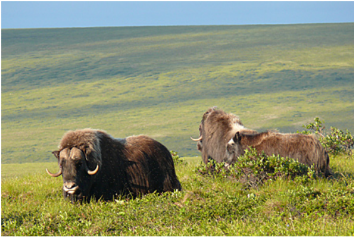

In [ ]:
# url = ("https://www.thisdogslife.co/wp-content/uploads/2020/08/" + \
#        "Dog-Photoshoot-Tips-3.png")
# img = Image.open(requests.get(url, stream=True).raw)
# #uncomment this one to load in downloaded image, adjust path as needed
# #img = Image.open("/content/gdrive/MyDrive/clarkFiles/dsci215/assignment2/ox.png") 

# img = img.convert("RGB")
# img_trans = transform(img)
# batch_t = torch.unsqueeze(img_trans, 0)
# img  ## this lets us see your image

url = ("https://images.squarespace-cdn.com/content/v1/5bc75d83e4afe931ade4f0d8/1588198115805-N7WR0VHEO0K1NFDHS3M6/" + \
       "musk+ox.png")
img = Image.open(requests.get(url, stream=True).raw)
# uncomment this one to load in downloaded image, adjust path as needed
# img = Image.open("/content/gdrive/MyDrive/Dog-Photoshoot-Tips-3.png") 

img = img.convert("RGB")
img_trans = transform(img)
batch_t = torch.unsqueeze(img_trans, 0)
img  ## this lets us see your image

#### Step 4: Load up class definitions
Use either the downloaded version, or, for the extra 1 point, show the method you used to pull it directly from its url. 

**<font color='red'> 0/1 bonus point</font>**

Downloaded version

In [ ]:
# Change the path accordingly
imagenet_class_mapping_path = "/content/gdrive/MyDrive/clarkFiles/dsci215/assignment2/1000cats.txt" 
with open(imagenet_class_mapping_path) as f:
    labels = [line.strip() for line in f.readlines()]

### Assignment code (5X)

Run each of your 5 model versions here. You will repeat the parts of Step 4 needed to run the models, as demonstrated in the next cells

**<font color='red'> 10/10 points on coding assignment 2</font>**

#### Demo

In [ ]:
# create model objects and look at its internals
alexnet = models.alexnet(pretrained=True)  # model
print(alexnet)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Check out the pooling layer and classifier. Note the name of the pooling layers will be different in different models. Please change accordingly. 

In [ ]:
print(alexnet.avgpool)
print("%" * 20)
print(alexnet.classifier)

AdaptiveAvgPool2d(output_size=(6, 6))
%%%%%%%%%%%%%%%%%%%%
Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


Report the accuracy metrics

In [ ]:
alexnet.eval()
out_vec = alexnet(batch_t)
print(out_vec.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

**Models and their accuracies:**

ResNet18 reports 46.93 relating to an Ox and interestingly 45.70 that it is a bison.  This is what I would expect a human to get the Ox confused with.

GoogLeNet reports 37.55 relating to an Ox which is the highest of any of the categories that it reports.

SqueezeNet1_1 reports 19.37 relating to an Ox and 45.78 that it is a black bear.

MobileNet_v3_large reports 89.13 relating to an Ox which is the highest of any of the categories that it reports.

Wide_ResNet50_2 reports 95.41 relating to an Ox which is the highest of any of the categories that it reports and this is the model with the highest accuracy that I ran.



#### Model 1

In [ ]:
# create model objects and look at its internals
resnet = models.resnet18(pretrained=True)  # model
print(resnet)

In [ ]:
print(resnet.avgpool)
print("%" * 20)
print(resnet.fc)

In [ ]:
resnet.eval()
out_vec = resnet(batch_t)
print(out_vec.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

#### Model 2

In [ ]:
# create model objects and look at its internals
googlenet = models.googlenet(pretrained=True)  # model
print(googlenet)

In [ ]:
print(googlenet.avgpool)
print("%" * 20)
print(googlenet.fc)

In [ ]:
googlenet.eval()
out_vec = googlenet(batch_t)
print(out_vec.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

#### Model 3

In [ ]:
# create model objects and look at its internals
squeezenet = models.squeezenet1_1(pretrained=True)  # model
print(squeezenet)

In [ ]:
print(squeezenet.features[-1])
print("%" * 20)
print(squeezenet.classifier)

In [ ]:
squeezenet.eval()
out_vec = squeezenet(batch_t)
print(out_vec.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

#### Model 4

In [ ]:
# create model objects and look at its internals
mobilenet = models.mobilenet_v3_large(pretrained=True)  # model
print(mobilenet)

In [ ]:
print(mobilenet.avgpool)
print("%" * 20)
print(mobilenet.classifier)

In [ ]:
mobilenet.eval()
out_vec = mobilenet(batch_t)
print(out_vec.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

#### Model 5

In [ ]:
# create model objects and look at its internals
wideresnet = models.wide_resnet50_2(pretrained=True)  # model
print(wideresnet)

In [ ]:
print(wideresnet.avgpool)
print("%" * 20)
print(wideresnet.fc)

In [ ]:
wideresnet.eval()
out_vec = wideresnet(batch_t)
print(out_vec.shape)

print("%" * 20)
percentage = torch.nn.functional.softmax(out_vec, dim=1)[0] * 100
_, indices = torch.sort(out_vec, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]